<a href="https://colab.research.google.com/github/damilare-akin/deep-rl-class/blob/main/personal-notebooks/worm_ml_agents.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The task: train a Unity ML-Agents [Walker](https://github.com/Unity-Technologies/ml-agents/blob/main/docs/Learning-Environment-Examples.md#walker) model

In [ ]:
# clone the repository
!git clone https://github.com/huggingface/ml-agents/

fatal: destination path 'ml-agents' already exists and is not an empty directory.


In [ ]:
# install the packages in the repository
%cd ml-agents
!pip install -e ./ml-agents-envs
!pip install -e ./ml-agents

/content/ml-agents
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/ml-agents/ml-agents-envs
  Running setup.py develop for mlagents-envs
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining file:///content/ml-agents/ml-agents
     |████████████████████████████████| 163 kB 7.7 MB/s 
     |████████████████████████████████| 804.1 MB 2.7 kB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.12.1+cu113
    Uninstalling torch-1.12.1+cu113:
      Successfully uninstalled torch-1.12.1+cu113
  Running setup.py develop for mlagents
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchvision 0.13.1+cu113 requires torch==1.12.1, but you have torch 1.8.1 which is incompatible.
torchtext 0.13.1 requires torch==1.12.1, but

In [ ]:
!mkdir ./trained-envs-executables/linux -p

In [ ]:
https://drive.google.com/file/d/1QceC2ruHIsL11-YXMlLZTr7rRDH-4EpL/view?usp=sharing

Download the zip exe linux file using wget, following the instructions [here](https://bcrf.biochem.wisc.edu/2021/02/05/download-google-drive-files-using-wget/)

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1QceC2ruHIsL11-YXMlLZTr7rRDH-4EpL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1QceC2ruHIsL11-YXMlLZTr7rRDH-4EpL" -O ./trained-envs-executables/linux/Worm.zip && rm -rf /tmp/cookies.txt

--2022-10-17 18:59:05--  https://docs.google.com/uc?export=download&confirm=t&id=1QceC2ruHIsL11-YXMlLZTr7rRDH-4EpL
Resolving docs.google.com (docs.google.com)... 173.194.203.138, 173.194.203.113, 173.194.203.139, ...
Connecting to docs.google.com (docs.google.com)|173.194.203.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q91vmm1qg1oi5p6d4e71s0k592g2sv8d/1666033125000/09764732090272539193/*/1QceC2ruHIsL11-YXMlLZTr7rRDH-4EpL?e=download&uuid=36b80f4a-5914-4f6a-baf8-36f86cc62d8b [following]
--2022-10-17 18:59:05--  https://doc-14-8c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/q91vmm1qg1oi5p6d4e71s0k592g2sv8d/1666033125000/09764732090272539193/*/1QceC2ruHIsL11-YXMlLZTr7rRDH-4EpL?e=download&uuid=36b80f4a-5914-4f6a-baf8-36f86cc62d8b
Resolving doc-14-8c-docs.googleusercontent.com (doc-14-8c-docs.googleusercontent.com)... 74.125.197.1

Unzip the file:

In [ ]:
!unzip -d ./trained-envs-executables/linux/ ./trained-envs-executables/linux/Worm.zip

Archive:  ./trained-envs-executables/linux/Worm.zip
   creating: ./trained-envs-executables/linux/Worm/
  inflating: ./trained-envs-executables/linux/Worm/Worm  
  inflating: ./trained-envs-executables/linux/Worm/UnityPlayer.so  
   creating: ./trained-envs-executables/linux/Worm/Worm_BurstDebugInformation_DoNotShip/
   creating: ./trained-envs-executables/linux/Worm/Worm_BurstDebugInformation_DoNotShip/Data/
   creating: ./trained-envs-executables/linux/Worm/Worm_BurstDebugInformation_DoNotShip/Data/Plugins/
  inflating: ./trained-envs-executables/linux/Worm/Worm_BurstDebugInformation_DoNotShip/Data/Plugins/lib_burst_generated.txt  
   creating: ./trained-envs-executables/linux/Worm/Worm_Data/
  inflating: ./trained-envs-executables/linux/Worm/Worm_Data/resources.assets  
  inflating: ./trained-envs-executables/linux/Worm/Worm_Data/app.info  
  inflating: ./trained-envs-executables/linux/Worm/Worm_Data/level0  
  inflating: ./trained-envs-executables/linux/Worm/Worm_Data/boot.config  

Change the permissions on the file so it becomes an executable

In [ ]:
!chmod -R 755 ./trained-envs-executables/linux/Worm/Worm

Inspecting the hyperparameters found at /content/ml-agents/config/ppo/Worm.yaml, I see that `max_steps` is set to 7,000,000. That's a lot so I'll make it less (not sure at what point colab cuts my training time)
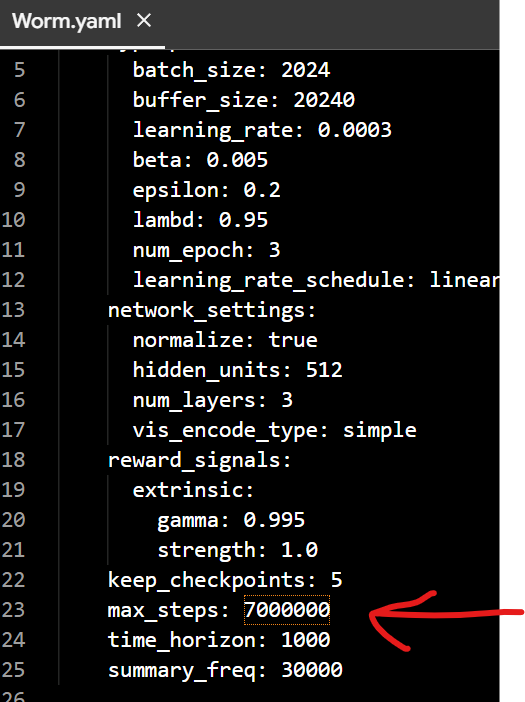

I'll set it to 800,000 instead. Hopefully, that's enough😐

## Training the agent
I'll use the command line tool we installed earlier, `ml-agents`. Check [here](https://colab.research.google.com/github/huggingface/deep-rl-class/blob/main/unit4/unit4.ipynb#scrollTo=f9fI555bO12v) to understand what's going on

In [ ]:
'''
to avoid the error:
    AttributeError: 'str' object has no attribute '_key'
in the next cell, run the following line:  
'''
!pip install importlib-metadata==4.4

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 5.0.0
    Uninstalling importlib-metadata-5.0.0:
      Successfully uninstalled importlib-metadata-5.0.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gym 0.25.2 requires importlib-metadata>=4.8.0; python_version < "3.10", but you have importlib-metadata 4.4.0 which is incompatible.


In [23]:
!mlagents-learn ./config/ppo/Worm.yaml --env=./trained-envs-executables/linux/Worm/Worm --run-id="Worm Training" --no-graphics --resume


            ┐  ╖
        ╓╖╬│╡  ││╬╖╖
    ╓╖╬│││││┘  ╬│││││╬╖
 ╖╬│││││╬╜        ╙╬│││││╖╖                               ╗╗╗
 ╬╬╬╬╖││╦╖        ╖╬││╗╣╣╣╬      ╟╣╣╬    ╟╣╣╣             ╜╜╜  ╟╣╣
 ╬╬╬╬╬╬╬╬╖│╬╖╖╓╬╪│╓╣╣╣╣╣╣╣╬      ╟╣╣╬    ╟╣╣╣ ╒╣╣╖╗╣╣╣╗   ╣╣╣ ╣╣╣╣╣╣ ╟╣╣╖   ╣╣╣
 ╬╬╬╬┐  ╙╬╬╬╬│╓╣╣╣╝╜  ╫╣╣╣╬      ╟╣╣╬    ╟╣╣╣ ╟╣╣╣╙ ╙╣╣╣  ╣╣╣ ╙╟╣╣╜╙  ╫╣╣  ╟╣╣
 ╬╬╬╬┐     ╙╬╬╣╣      ╫╣╣╣╬      ╟╣╣╬    ╟╣╣╣ ╟╣╣╬   ╣╣╣  ╣╣╣  ╟╣╣     ╣╣╣┌╣╣╜
 ╬╬╬╜       ╬╬╣╣      ╙╝╣╣╬      ╙╣╣╣╗╖╓╗╣╣╣╜ ╟╣╣╬   ╣╣╣  ╣╣╣  ╟╣╣╦╓    ╣╣╣╣╣
 ╙   ╓╦╖    ╬╬╣╣   ╓╗╗╖            ╙╝╣╣╣╣╝╜   ╘╝╝╜   ╝╝╝  ╝╝╝   ╙╣╣╣    ╟╣╣╣
   ╩╬╬╬╬╬╬╦╦╬╬╣╣╗╣╣╣╣╣╣╣╝                                             ╫╣╣╣╣
      ╙╬╬╬╬╬╬╬╣╣╣╣╣╣╝╜
          ╙╬╬╬╣╣╣╜
             ╙
        
 Version information:
  ml-agents: 0.29.0.dev0,
  ml-agents-envs: 0.29.0.dev0,
  Communicator API: 1.5.0,
  PyTorch: 1.8.1+cu102
[INFO] Connected to Unity environment with package version 2.2.1-exp.1 and communication version 1.5.0
[INFO] Connected new brain: Worm?team=0
[

Pushing to the Huggingface hub
First we login:

In [21]:
from huggingface_hub import notebook_login
notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token


Then we run `mlagents-push-to-hf`

In [24]:
!mlagents-push-to-hf --run-id="Worm Training" --local-dir="./results/Worm Training" --repo-id="damilare-akin/test_worm" --commit-message="Second Worm"

Worm Training
damilare-akin/test_worm
This function will create a model card and upload your Worm Training into HuggingFace Hub. This is a work in progress: If you encounter a bug, please send open an issue
REPO NAME:  test_worm
ORGANIZATION:  damilare-akin
/usr/local/lib/python3.7/dist-packages/huggingface_hub/hf_api.py:104: FutureWarning: `name` and `organization` input arguments are deprecated and will be removed in v0.10. Pass `repo_id` instead.
  FutureWarning,
/content/ml-agents/hub/test_worm is already a clone of https://huggingface.co/damilare-akin/test_worm. Make sure you pull the latest changes with `repo.git_pull()`.
Upload file Worm/Worm-2999000.pt:   0% 3.34k/12.9M [00:00<?, ?B/s]
Upload file Worm/Worm-2499000.onnx:   0% 3.34k/2.15M [00:00<?, ?B/s]

Upload file Worm/Worm-1499000.pt:   0% 3.34k/12.9M [00:00<?, ?B/s]


Upload file Worm/Worm-2499000.pt:   0% 3.34k/12.9M [00:00<?, ?B/s]


Upload file Worm/Worm-2499000.pt:   1% 151k/12.9M [00:01<01:28, 151kB/s]
Upload file Worm

Check it out [here](https://huggingface.co/damilare-akin/test_worm)